In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import random

from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

pd.pandas.set_option('display.max_columns', None)

In [26]:
data = pd.read_csv('kc_house_data_train.csv')
data.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [ ]:
# linear regression in python by Dannar Mawardi https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606

# First Step: Visualization

## Pairplot of continuous variables' relationship to 'price'

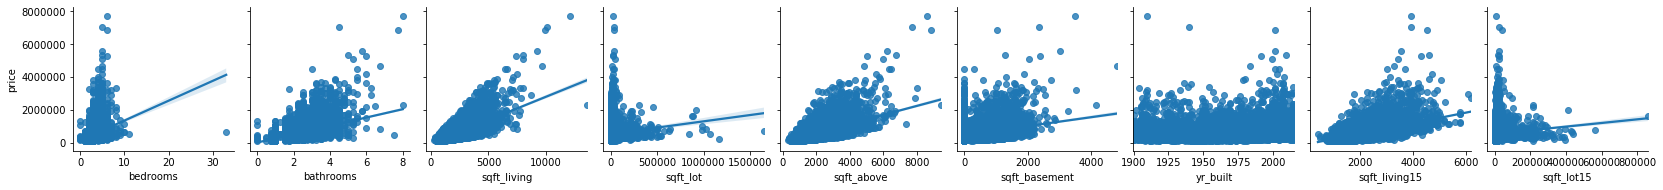

In [8]:
sns.pairplot(data=data, x_vars= ['bedrooms', 'bathrooms', 'sqft_living',
                                 'sqft_lot', 'sqft_above', 'sqft_basement', 
                                 'yr_built', 'sqft_living15', 
                                 'sqft_lot15'], 
            y_vars='price', kind='reg')

## Pairplot of categorical variables' relationship to 'price'

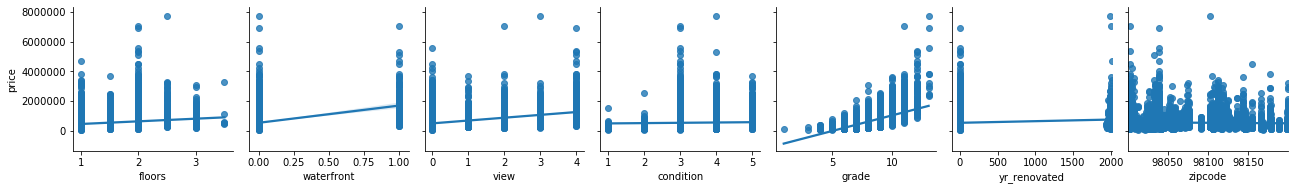

In [7]:
sns.pairplot(data=data, x_vars= ['floors', 'waterfront', 
                                 'view', 'condition', 'grade',
                                 'yr_renovated', 'zipcode'], 
            y_vars='price', kind='reg')

# Second Step: SK Learn - Setting Variables

In [27]:
feature_cols = ['bedrooms', 'bathrooms', 'sqft_living',
                'sqft_lot', 'sqft_above', 'sqft_basement', 
                'yr_built', 'sqft_living15', 'sqft_lot15',
                'floors', 'waterfront', 'view', 'condition', 
                'grade', 'yr_renovated', 'zipcode'] #### lat/long?
X = data[feature_cols]
y = data['price']

# Third Step: SK Learn - Splitting Our Data

In [28]:
# train_test_split defaults to a good 3/4 and 1/4 split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=14)

# Fourth Step: SK Learn - Training Our Model

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Fifth Step: Interpretting Coefficients

In [31]:
print(lr.intercept_)
print(lr.coef_)
feature_coefs = list(zip(feature_cols, lr.coef_))
feature_coefs

3083280.9996813824
[-4.33380841e+04  4.71997762e+04  1.13632178e+02 -4.89254416e-02
  5.56476331e+01  5.79845454e+01 -3.61557033e+03  2.39936988e+01
 -4.71131080e-01  2.65124085e+04  5.71567638e+05  4.29051183e+04
  2.20673591e+04  1.21189436e+05  8.55617236e+00  3.24055756e+01]


[('bedrooms', -43338.08410771108),
 ('bathrooms', 47199.77620811494),
 ('sqft_living', 113.63217831841705),
 ('sqft_lot', -0.04892544158027261),
 ('sqft_above', 55.647633141042135),
 ('sqft_basement', 57.984545374539465),
 ('yr_built', -3615.570328643359),
 ('sqft_living15', 23.993698789336637),
 ('sqft_lot15', -0.47113108024572314),
 ('floors', 26512.40847668461),
 ('waterfront', 571567.6383687321),
 ('view', 42905.11827861707),
 ('condition', 22067.359098946992),
 ('grade', 121189.43638364729),
 ('yr_renovated', 8.556172362659899),
 ('zipcode', 32.405575601268474)]

# Sixth Step: Making predictions based on your model

In [32]:
y_pred = lr.predict(X_test)

# Seventh Step: Model Evaluation

In [33]:
print(metrics.mean_absolute_error(y_test, y_pred))

143643.4420865468


In [34]:
print(metrics.mean_squared_error(y_test, y_pred))

49748060823.13119


In [35]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

223042.7331771452


In [36]:
print(metrics.r2_score(y_test, y_pred))

0.6325725647640927


# Eighth Step: Feature Selection

Decide which variables I think have less significance in determining the target variable and remove them from my model and reevaluate

In [37]:
feature_cols = ['bedrooms', 'bathrooms', 'yr_built', 'floors', 
                'waterfront', 'view', 'condition', 'grade', 
                'sqft_living', 'zipcode']
X = data[feature_cols]
y = data['price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=14)

In [39]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print(lr.intercept_)
print(lr.coef_)
feature_coefs = list(zip(feature_cols, lr.coef_))
feature_coefs

3825747.1553871725
[-4.15777021e+04  4.82757573e+04 -3.67344087e+03  2.66499430e+04
  5.71037523e+05  4.43355951e+04  2.07378737e+04  1.26471086e+05
  1.73751169e+02  2.58789656e+01]


[('bedrooms', -41577.702100395494),
 ('bathrooms', 48275.75730053299),
 ('yr_built', -3673.4408673966445),
 ('floors', 26649.9429673077),
 ('waterfront', 571037.5226052229),
 ('view', 44335.59513280863),
 ('condition', 20737.873675975155),
 ('grade', 126471.08589141919),
 ('sqft_living', 173.75116864471244),
 ('zipcode', 25.878965618585617)]

In [41]:
y_pred = lr.predict(X_test)

In [42]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

143871.14726634172
50032936274.07276
223680.4333733122
0.630468541922413


# Making a better model

## Polynomials

In [20]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [21]:
features = ['bedrooms', 'bathrooms', 'sqft_living',
                'sqft_lot', 'sqft_above', 'sqft_basement', 
                'yr_built', 'sqft_living15', 'sqft_lot15',
                'floors', 'waterfront', 'view', 'condition', 
                'grade', 'yr_renovated', 'zipcode']

df_features = data[features]

In [24]:
poly_data = poly.fit_transform(df_features)
poly_columns = poly.get_feature_names(df_features.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)
df_poly.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,floors,waterfront,view,condition,grade,yr_renovated,zipcode,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms sqft_above,bedrooms sqft_basement,bedrooms yr_built,bedrooms sqft_living15,bedrooms sqft_lot15,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms yr_renovated,bedrooms zipcode,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms sqft_above,bathrooms sqft_basement,bathrooms yr_built,bathrooms sqft_living15,bathrooms sqft_lot15,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms yr_renovated,bathrooms zipcode,sqft_living^2,sqft_living sqft_lot,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_built,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living yr_renovated,sqft_living zipcode,sqft_lot^2,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_built,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot yr_renovated,sqft_lot zipcode,sqft_above^2,sqft_above sqft_basement,sqft_above yr_built,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_above floors,sqft_above waterfront,sqft_above view,sqft_above condition,sqft_above grade,sqft_above yr_renovated,sqft_above zipcode,sqft_basement^2,sqft_basement yr_built,sqft_basement sqft_living15,sqft_basement sqft_lot15,sqft_basement floors,sqft_basement waterfront,sqft_basement view,sqft_basement condition,sqft_basement grade,sqft_basement yr_renovated,sqft_basement zipcode,yr_built^2,yr_built sqft_living15,yr_built sqft_lot15,yr_built floors,yr_built waterfront,yr_built view,yr_built condition,yr_built grade,yr_built yr_renovated,yr_built zipcode,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 floors,sqft_living15 waterfront,sqft_living15 view,sqft_living15 condition,sqft_living15 grade,sqft_living15 yr_renovated,sqft_living15 zipcode,sqft_lot15^2,sqft_lot15 floors,sqft_lot15 waterfront,sqft_lot15 view,sqft_lot15 condition,sqft_lot15 grade,sqft_lot15 yr_renovated,sqft_lot15 zipcode,floors^2,floors waterfront,floors view,floors condition,floors grade,floors yr_renovated,floors zipcode,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront yr_renovated,waterfront zipcode,view^2,view condition,view grade,view yr_renovated,view zipcode,condition^2,condition grade,condition yr_renovated,condition zipcode,grade^2,grade yr_renovated,grade zipcode,yr_renovated^2,yr_renovated zipcode,zipcode^2
0,4.0,2.25,2070.0,8893.0,2070.0,0.0,1986.0,2390.0,7700.0,2.0,0.0,0.0,4.0,8.0,0.0,98058.0,16.0,9.0,8280.0,35572.0,8280.0,0.0,7944.0,9560.0,30800.0,8.0,0.0,0.0,16.0,32.0,0.0,392232.0,5.0625,4657.5,20009.25,4657.5,0.0,4468.5,5377.5,17325.0,4.5,0.0,0.0,9.0,18.0,0.0,220630.5,4284900.0,18408510.0,4284900.0,0.0,4111020.0,4947300.0,15939000.0,4140.0,0.0,0.0,8280.0,16560.0,0.0,202980060.0,79085449.0,18408510.0,0.0,17661498.0,21254270.0,68476100.0,17786.0,0.0,0.0,35572.0,71144.0,0.0,8.720298e+08,4284900.0,0.0,4111020.0,4947300.0,15939000.0,4140.0,0.0,0.0,8280.0,16560.0,0.0,202980060.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3944196.0,4746540.0,15292200.0,3972.0,0.0,0.0,7944.0,15888.0,0.0,194743188.0,5712100.0,18403000.0,4780.0,0.0,0.0,9560.0,19120.0,0.0,234358620.0,59290000.0,15400.0,0.0,0.0,30800.0,61600.0,0.0,7.550466e+08,4.0,0.0,0.0,8.0,16.0,0.0,196116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,32.0,0.0,392232.0,64.0,0.0,784464.0,0.0,0.0,9.615371e+09
1,5.0,3.00,2900.0,6730.0,1830.0,1070.0,1977.0,2370.0,6283.0,1.0,0.0,0.0,5.0,8.0,0.0,98115.0,25.0,15.0,14500.0,33650.0,9150.0,5350.0,9885.0,11850.0,31415.0,5.0,0.0,0.0,25.0,40.0,0.0,490575.0,9.0000,8700.0,20190.00,5490.0,3210.0,5931.0,7110.0,18849.0,3.0,0.0,0.0,15.0,24.0,0.0,294345.0,8410000.0,

# Feature Selection Lecture

In [52]:
data['month_sold'] = data['date'].apply(lambda x: int(x[4:6]))
data['yr_sold'] = data['date'].apply(lambda x: int(x[:4]))
data['yr_since_reno'] = data['yr_sold'] - data['yr_renovated']

In [53]:
print(data.columns)
print(len(data.columns))

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month_sold', 'yr_sold',
       'yr_since_reno'],
      dtype='object')
23


## Baseline

In [60]:
# features = ['bedrooms', 'bathrooms', 'sqft_living',
#        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
#        'lat', 'long', 'sqft_living15', 'sqft_lot15']

features_eng = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month_sold', 'yr_sold',
       'yr_since_reno']

df_features = data[features_eng]
target = data['price']
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=88)

In [61]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [62]:
baseline = LinearRegression()
baseline = baseline.fit(X_train, y_train)
y_train_pred = baseline.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Baseline Model Training RMSE: ', train_rmse)

Baseline Model Training RMSE:  208058.13088179976


In [63]:
y_test_pred = baseline.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Baseline Model Test RMSE: ', test_rmse)

Baseline Model Test RMSE:  194398.76892520243


In [64]:
metrics.r2_score(y_test, y_test_pred)

0.6974445894340684

## Log Model

In [65]:
y_log = np.log(y_train)
lr_log = LinearRegression()
lr_log = lr_log.fit(X_train, y_log)
log_train_pred = lr_log.predict(X_train)

In [66]:
y_train_pred = np.exp(log_train_pred)

In [67]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))
print('Log Model Training RMSE: ', train_rmse)

Log Model Training RMSE:  661691.7321091507


In [68]:
log_test_pred = lr_log.predict(X_test)
log_test_pred = np.exp(log_test_pred)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, log_test_pred))
print('Log Model Test RMSE: ', log_test_rmse)

Log Model Test RMSE:  173425.13807990582


## Polynomial Models
### 2nd Degree

In [69]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.shape

(17290, 252)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=88)

In [71]:
scaler2 = StandardScaler()
scaler2.fit(X_train)
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2.columns)
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly2.columns)

In [72]:
lr_poly = LinearRegression()
lr_poly = lr_poly.fit(X_train, y_train)
y_train_pred = lr_poly.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Poly Model Training RMSE: ', train_rmse)

Poly Model Training RMSE:  152748.8158005059


In [73]:
y_pred = lr_poly.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Poly Model Test RMSE: ', test_rmse)

Poly Model Test RMSE:  151423.2210266124


### 3rd Degree

In [74]:
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)
df_poly3.shape

(17290, 2023)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df_poly3, target, random_state=88)

In [76]:
scaler3 = StandardScaler()
scaler3.fit(X_train)
X_train = pd.DataFrame(data=scaler3.transform(X_train), columns=df_poly3.columns)
X_test = pd.DataFrame(data=scaler3.transform(X_test), columns=df_poly3.columns)

In [77]:
lr_poly3 = LinearRegression()
lr_poly3 = lr_poly3.fit(X_train, y_train)
y_train_pred = lr_poly3.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Poly 3 Model Training RMSE: ', train_rmse)

Poly 3 Model Training RMSE:  105609.97371054329


In [78]:
y_pred = lr_poly3.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Poly 3 Model Test RMSE: ', test_rmse)

Poly 3 Model Test RMSE:  30850402627237.008


### Kbest

In [85]:
selector = SelectKBest(f_regression, k=130)
selector.fit(X_train, y_train)

SelectKBest(k=400, score_func=<function f_regression at 0x7ff151a2c598>)

In [86]:
selected_columns = X_train.columns[selector.get_support()]

In [88]:
lr_kbest = LinearRegression()
lr_kbest = lr_kbest.fit(X_train[selected_columns], y_train)
y_train_kbest = lr_kbest.predict(X_train[selected_columns])
train_k_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))
print('Kbest Train RMSE: ', train_k_rmse)

Kbest Train RMSE:  143677.29766234724


In [90]:
y_kbest = lr_kbest.predict(X_test[selected_columns])

test_k_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Kbest Test RMSE: ' , test_k_rmse)

Kbest Test RMSE:  167980.5192030715


### RFE

In [91]:
from sklearn.feature_selection import RFECV
ols = linear_model.LinearRegression()

In [94]:
# reverting back to 2nd degree poly as it gave the best test RMSE
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=88)
scaler2 = StandardScaler()
scaler2.fit(X_train)
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2.columns)
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly2.columns)

In [98]:
lr_poly = LinearRegression()
lr_poly = lr_poly.fit(X_train, y_train)
y_train_pred = lr_poly.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Poly Model Training RMSE: ', train_rmse)

Poly Model Training RMSE:  152923.5637935754


In [95]:
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
selector.fit(X_train, y_train)

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [99]:
selected_rfe = X_train.columns[selector.support_]
len(list(selected_rfe))

244

In [97]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


Training Root Mean Squared Error: 152815.03988630156
Testing Root Mean Squared Error: 151263.3721579318


# Final Model and Pickling